In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.models import Model

import matplotlib.pyplot as plt
import matplotlib.style as sty

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

import os
import random as rn
import seaborn as sns

import tensorflow as tf



In [2]:
#Configurações Arbritarias escolhidas para treinamento
batch_size = 64
num_classes = 10
epochs = 50

#Cada imagem do MNIST tem o tamanho de 28 por 28 pixels
img_rows, img_cols = 28, 28

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


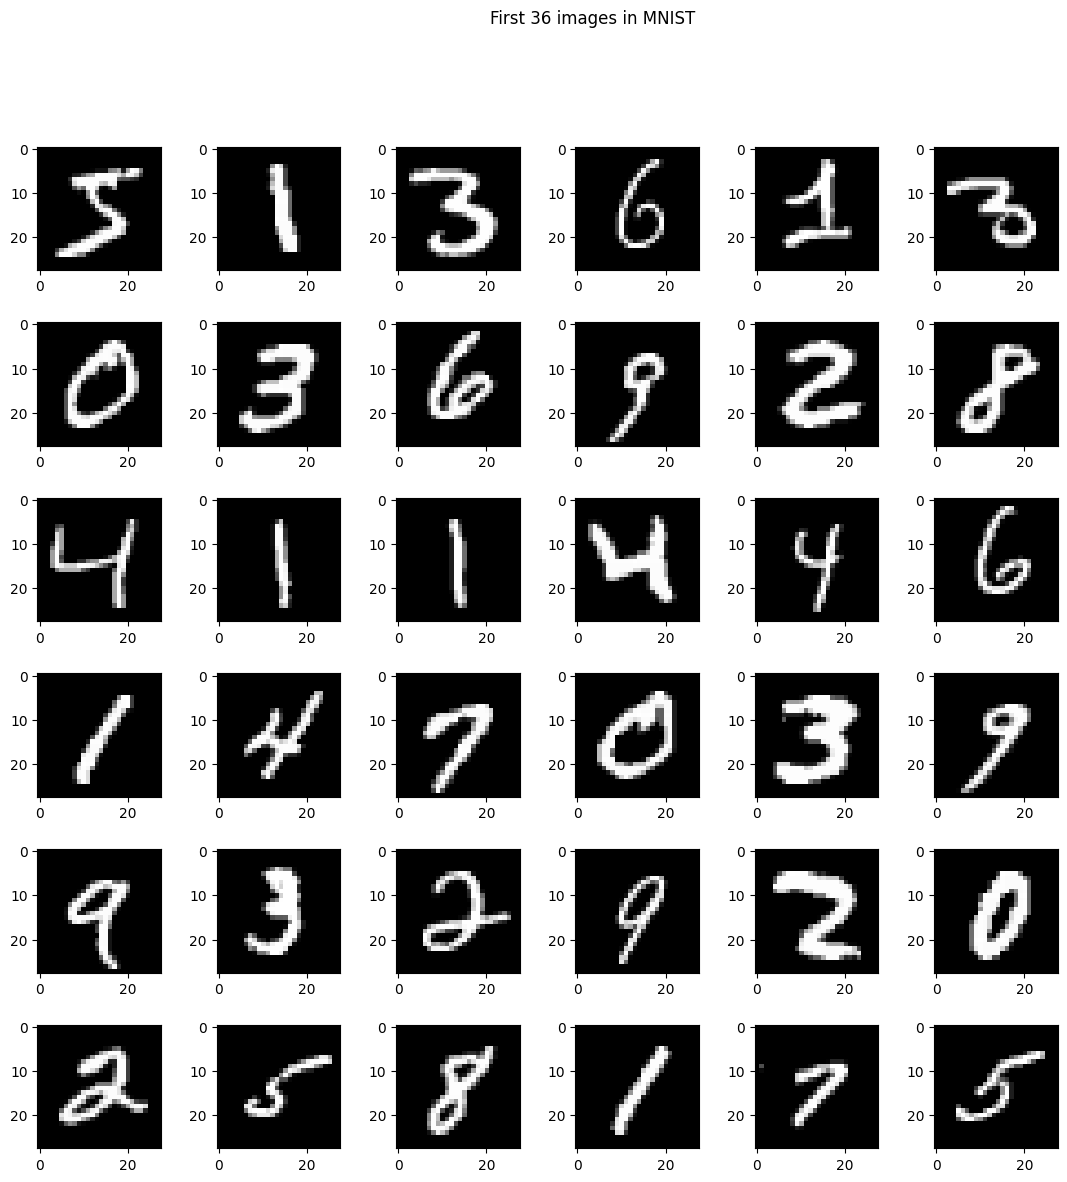

In [3]:
#Carregando imagens e plotando alguns exemplos

from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255.0
x_test /= 255.0

# plot first 36 images in MNIST
fig, ax = plt.subplots(6, 6, figsize = (12, 12))
fig.suptitle('First 36 images in MNIST')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(6) for j in range(6)]:
    ax[x, y].imshow(x_train[x + y * 6].reshape((28, 28)), cmap = 'gray')
#    ax[x, y].set_title(y_train[x + y * 6])


In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
#Inserir estrutura da CNN nessa parte do codigo
model=Sequential()

# Blocos 1,2 e 3 para aprendizado da representação
# Primeiro Bloco
model.add(Conv2D(32,(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2,2)))

# Segundo
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2,2)))

# Terceiro Bloco
model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2,2)))

# Parte totalmente conectada
model.add(Flatten())  #GlobalAvgPooling()/GlobalMaxPoolin()
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))










/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compilar a CNN
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [7]:
# Imprimir a architetura
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 881,898 (3.36 MB)

 Trainable params: 881,898 (3.36 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Treinar a CNN
# Uso do ModelCheckPoint para salvar o melhor modelo
# ao longo das épocas de treinamento
fp='./checkpoints/bestmodel.keras'
mc=tf.keras.callbacks.ModelCheckpoint(
    filepath=fp,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

# Treinamento do modelo usando 20% da base de treinamento como validação
results=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[mc])

# Carregando o melhor model salvo em disco
model.load_weights(fp)


Epoch 1/50
746/750 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8712 - loss: 0.3986
Epoch 1: val_accuracy improved from -inf to 0.98450, saving model to ./checkpoints/bestmodel.keras
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8717 - loss: 0.3971 - val_accuracy: 0.9845 - val_loss: 0.1128
Epoch 2/50
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9827 - loss: 0.0536
Epoch 2: val_accuracy improved from 0.98450 to 0.99008, saving model to ./checkpoints/bestmodel.keras
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9827 - loss: 0.0535 - val_accuracy: 0.9901 - val_loss: 0.0654
Epoch 3/50
744/750 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9877 - loss: 0.0369
Epoch 3: val_accuracy improved from 0.99008 to 0.99042, saving model to ./checkpoints/bestmodel.keras
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9877 - loss: 0.0369 - val_accuracy: 0.9904 - val_loss: 0.0351
Epoch 4/50
744/750 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9893 - loss: 0.034

In [9]:
# Executar a avaliação (teste)
score=model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.019398098811507225
Test accuracy: 0.9943000078201294


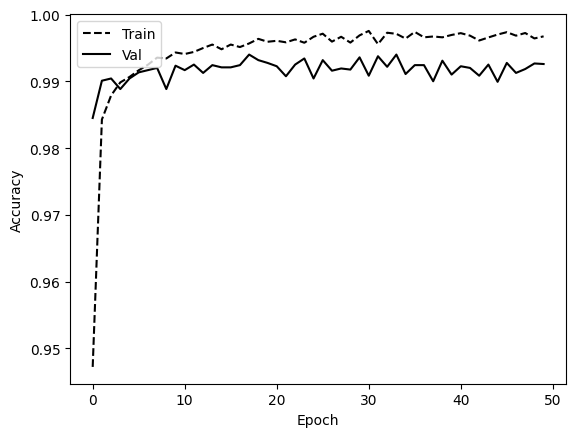

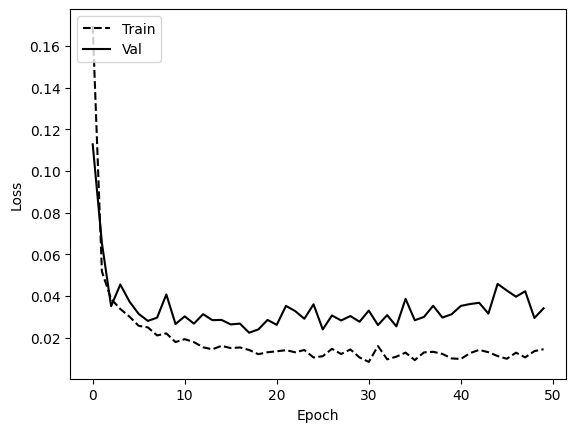

In [12]:
# Plotar o grafico do histórico de evolução do treinamento
#sty.use('seaborn-whitegrid')
#style.use('seaborn-whitegrid')
plt.plot(results.history['accuracy'],'k--')
plt.plot(results.history['val_accuracy'],'k')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plota o grafico do histórico de evolução da taxa de perda da rede
plt.plot(results.history['loss'],'k--')
plt.plot(results.history['val_loss'],'k')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [13]:
# Plotar a matrix de confusão
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation = 'nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  thresh = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [14]:
# Predição da CNN
y_predict=np.argmax(model.predict(x_test), axis=1)

# Preparar Matriz de Confusão
cm=confusion_matrix(np.argmax(y_test, axis=1), y_predict)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


Confusion matrix, without normalization
[[ 977    0    0    0    0    0    2    1    0    0]
 [   0 1133    0    0    0    1    1    0    0    0]
 [   0    0 1030    0    0    0    0    2    0    0]
 [   0    0    0 1002    0    6    0    1    1    0]
 [   0    0    0    0  977    0    1    0    0    4]
 [   0    0    0    4    0  887    1    0    0    0]
 [   2    1    0    0    0    1  953    0    1    0]
 [   1    4    8    0    0    0    0 1014    0    1]
 [   1    0    0    0    0    0    0    0  972    1]
 [   0    0    2    0    5    4    0    0    0  998]]


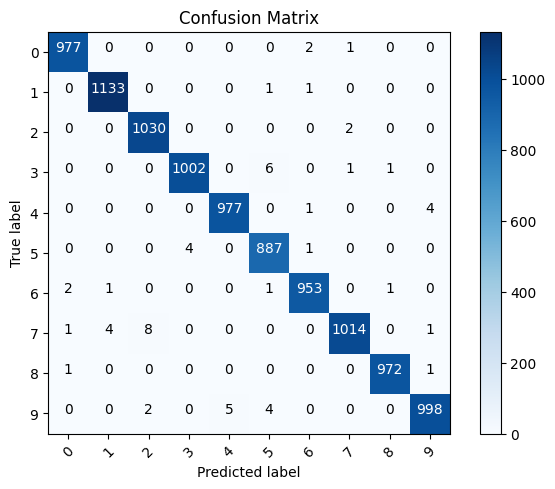

In [15]:
# Chamada da matriz confusão
cm_plot_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot_confusion_matrix(cm, cm_plot_labels, title= 'Confusion Matrix')


In [16]:
# Salvando o modelo, a arquitetura da CNN
model_json = model.to_json()
with open("cnn.json", "w") as json_file:
  json_file.write(model_json)

# Salvando os pesos da CNN
model.save_weights("cnn.weights.h5")

In [17]:
# Exemplo de como carregar a usar modelo salvo.

from keras.models import model_from_json

# Carregando o modelo
json_file=open("cnn.json", "r")
cnn_json=json_file.read()
json_file.close()

cnn_model=model_from_json(cnn_json)

# Carregando os pesos
cnn_model.load_weights("cnn.weights.h5")

# Predição usando o modelo carregado
y_predict=np.argmax(cnn_model.predict(x_test), axis=1)

y=np.argmax(y_test, axis=1)

# Predição usando apenas uma imagem
exemplo=x_test[2]
exemplo = exemplo.reshape(1, 28, 28, 1)
saida=cnn_model.predict(exemplo)
classe=np.argmax(saida, axis=1)
print(classe)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
[1]


In [ ]:
# Plotando os erros do modelo carregado
from matplotlib import pyplot as plt

rotulos=np.argmax(y_test, axis=1)

for i in range(len(x_test)):
  exemplo=x_test[i]
  exemplo = exemplo.reshape(1, 28, 28, 1)
  saida=cnn_model.predict(exemplo)
  classe=np.argmax(saida, axis=1)
  if (classe == rotulos[i]):
    continue
  print("Classe predita:", classe, "rótulo:", rotulos[i], "Score: ", np.max(saida))
  exemplo = exemplo.reshape(28, 28)
  plt.imshow(exemplo, interpolation='nearest')
  plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━